In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv("/content/train.csv")

In [46]:
data

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [47]:
data['Machine failure'].value_counts()

,count
Machine failure,
0,134281
1,2148


In [50]:
X=data.drop(['id', 'Machine failure', 'Product ID'],axis=1)
y=data['Machine failure']

In [51]:
X=pd.get_dummies(X,columns=['Type'],drop_first=True)

In [54]:
smote = SMOTE(random_state=42)
X_smote, y_smote= smote.fit_resample(X,y)

In [56]:
scaler = StandardScaler()
X_smote = scaler.fit_transform(X_smote)

In [57]:
model = LogisticRegression(random_state=42, class_weight='balanced',max_iter=1000)
model.fit(X_smote,y_smote)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [58]:
model.score(x,y)

0.8643627914597002

In [59]:
y_prob = model.predict_proba(X_smote)[:, 1]

In [60]:
auc = roc_auc_score(y_smote, y_prob)
fpr, tpr, _ = roc_curve(y_smote, y_prob)

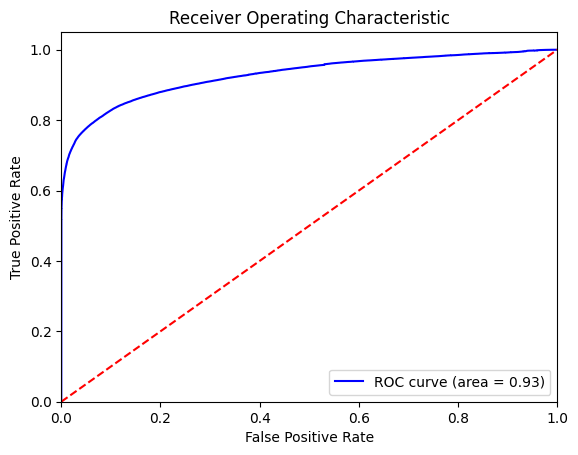

In [61]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [62]:
print(f'AUC-ROC: {auc:.4f}')

AUC-ROC: 0.9278


In [63]:
test_data=pd.read_csv("/content/test.csv")

In [67]:
prep_test_data=test_data.drop(['id', 'Product ID'],axis=1)
prep_test_data=pd.get_dummies(prep_test_data,columns=['Type'],drop_first=True)

In [68]:
prep_test_data = scaler.transform(prep_test_data)

In [69]:
y_test_prob = model.predict_proba(prep_test_data)[:, 1]

In [71]:
final_result = pd.DataFrame({
    'id': test_data['id'],
    'Machine failure': y_test_prob
})
final_result

,id,Machine failure
0,136429,0.178640
1,136430,0.093475
2,136431,0.226299
3,136432,0.142072
4,136433,0.195306
...,...,...
90949,227378,0.185733
90950,227379,0.026490
90951,227380,0.234239
90952,227381,0.194416


In [72]:
final_result.to_csv('submission.csv', index=False)